# Analiza wydatków na jedzenie w Polsce na przestrzeni lat 1999-2020

In [211]:
#import pliku i usunięcie wierszy bez żadnych wartości w kolumnie "Wartosc"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path_ludnosc = "ludnosc.csv"
data_path_gminy = "gminy.csv"
df_ludnosc = pd.read_csv(data_path_ludnosc, sep=";", decimal=',')
df_ludnosc = df_ludnosc[df_ludnosc['Wartosc'].notna()]

In [46]:
#przygotowanie tabeli
food_expenses = df_ludnosc[(df_ludnosc.Kategoria == "Wydatki") & (df_ludnosc.Nazwa == "POLSKA") & (df_ludnosc["Jednostka miary"] == "zł")]
food_expenses  = food_expenses[food_expenses.Rok != 1998]
food_expenses  = food_expenses[(food_expenses.Zmienna != "ogółem (BAEL)") & (food_expenses.Zmienna != "towary i usługi konsumpcyjne (BAEL)")]

## Wydatki na żywność i napoje bezalkoholowe w stosunku do całkowitych wydatków na towary i usługi konsumpcyjne

     Rok    Udzial
0   1999  0.323324
1   2000  0.319882
2   2001  0.322236
3   2002  0.308094
4   2003  0.290132
5   2004  0.293076
6   2005  0.293793
7   2006  0.283639
8   2007  0.278205
9   2008  0.267115
10  2009  0.262710
11  2010  0.260245
12  2011  0.261496
13  2012  0.262488
14  2013  0.259808
15  2014  0.255268
16  2015  0.251527
17  2016  0.252570
18  2017  0.254121
19  2018  0.259146
20  2019  0.261690
21  2020  0.287478


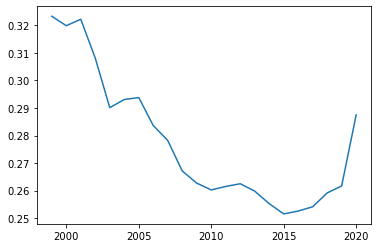

In [358]:
food_expenses_vs_total = food_expenses[(food_expenses.Zmienna == "żywność i napoje bezalkoholowe") | (food_expenses.Zmienna == "towary i usługi konsumpcyjne")]
food_expenses_vs_total = food_expenses_vs_total.drop(['Kod','Unnamed: 8'], axis=1)
food_expenses_vs_total = food_expenses_vs_total.groupby(['Rok','Zmienna']).sum().reset_index()
food = food_expenses_vs_total[food_expenses_vs_total.Zmienna == "żywność i napoje bezalkoholowe"].reset_index()
total = food_expenses_vs_total[food_expenses_vs_total.Zmienna == "towary i usługi konsumpcyjne"].reset_index()
final_array = pd.DataFrame(columns=['Rok','Udzial'])
final_array['Rok'] = food['Rok']
final_array['Udzial'] = food['Wartosc']/total['Wartosc']
final_array['Udzial']
print(final_array)
plt.figure()
plt.plot(final_array['Rok'], final_array['Udzial'])

## Wydatki na napoje alkoholowe i wyroby tytoniowe vs. żywność i napoje bezalkoholowe

     Rok    Udzial
0   1999  0.101394
1   2000  0.097310
2   2001  0.098389
3   2002  0.101132
4   2003  0.102593
5   2004  0.097447
6   2005  0.097115
7   2006  0.098907
8   2007  0.101219
9   2008  0.103011
10  2009  0.108547
11  2010  0.109450
12  2011  0.107858
13  2012  0.107864
14  2013  0.103268
15  2014  0.103440
16  2015  0.103156
17  2016  0.102271
18  2017  0.098136
19  2018  0.100363
20  2019  0.100843
21  2020  0.103823


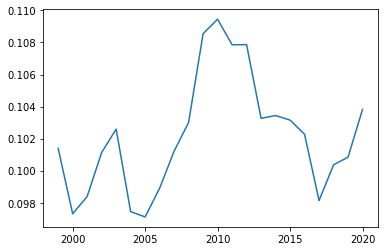

In [317]:
food_expenses_vs_alco = food_expenses[(food_expenses.Zmienna == "żywność i napoje bezalkoholowe") | (food_expenses.Zmienna == "napoje alkoholowe i wyroby tytoniowe")]
food_expenses_vs_alco = food_expenses_vs_alco.drop(['Kod','Unnamed: 8'], axis=1)
food_expenses_vs_alco = food_expenses_vs_alco.groupby(['Rok','Zmienna']).sum().reset_index()
alco = food_expenses_vs_alco[food_expenses_vs_alco.Zmienna == "napoje alkoholowe i wyroby tytoniowe"].reset_index()
non_alco = food_expenses_vs_alco[food_expenses_vs_alco.Zmienna == "żywność i napoje bezalkoholowe"].reset_index()
final_array_alco = pd.DataFrame(columns=['Rok','Udzial'])
final_array_alco['Rok'] = food['Rok']
final_array_alco['Udzial'] = alco['Wartosc']/non_alco['Wartosc']
final_array_alco['Udzial'].multiply(100)
print(final_array_alco)
plt.figure()
plt.plot(final_array_alco['Rok'], final_array_alco['Udzial'])

## Korelacja wydatków 

Zmienna,edukacja,napoje alkoholowe i wyroby tytoniowe,odzież i obuwie,pozostałe wydatki na towary i usługi,rekreacja i kultura,restauracje i hotele,transport,użytkowanie mieszkania lub domu i nośniki energii,wyposażenie mieszkania i prowadzenie gospodarstwa domowego,zdrowie,łączność,żywność i napoje bezalkoholowe
Zmienna,,,,,,,,,,,,
edukacja,1.000000,0.749919,0.664436,0.729950,0.721221,0.674130,0.782356,0.716060,0.736557,0.719974,0.678012,0.746491
napoje alkoholowe i wyroby tytoniowe,0.749919,1.000000,0.871801,0.953567,0.882551,0.866535,0.950118,0.948384,0.952984,0.955050,0.884786,0.986447
odzież i obuwie,0.664436,0.871801,1.000000,0.932615,0.924225,0.889793,0.923028,0.940293,0.894227,0.942864,0.893993,0.871678
pozostałe wydatki na towary i usługi,0.729950,0.953567,0.932615,1.000000,0.848534,0.965005,0.947710,0.951096,0.968196,0.986668,0.928098,0.978309
rekreacja i kultura,0.721221,0.882551,0.924225,0.848534,1.000000,0.749890,0.925153,0.925755,0.848203,0.896321,0.821153,0.843215
restauracje i hotele,0.674130,0.866535,0.889793,0.965005,0.749890,1.000000,0.884411,0.874640,0.924761,0.931858,0.849024,0.916814
transport,0.782356,0.950118,0.923028,0.947710,0.925153,0.884411,1.000000,0.942989,0.950919,0.945680,0.860940,0.945991
użytkowanie mieszkania lub domu i nośniki energii,0.716060,0.948384,0.940293,0.951096,0.925755,0.874640,0.942989,1.000000,0.894484,0.977639,0.938120,0.935497
wyposażenie mieszkania i prowadzenie gospodarstwa domowego,0.736557,0.952984,0.894227,0.968196,0.848203,0.924761,0.950919,0.894484,1.000000,0.947557,0.855213,0.970362


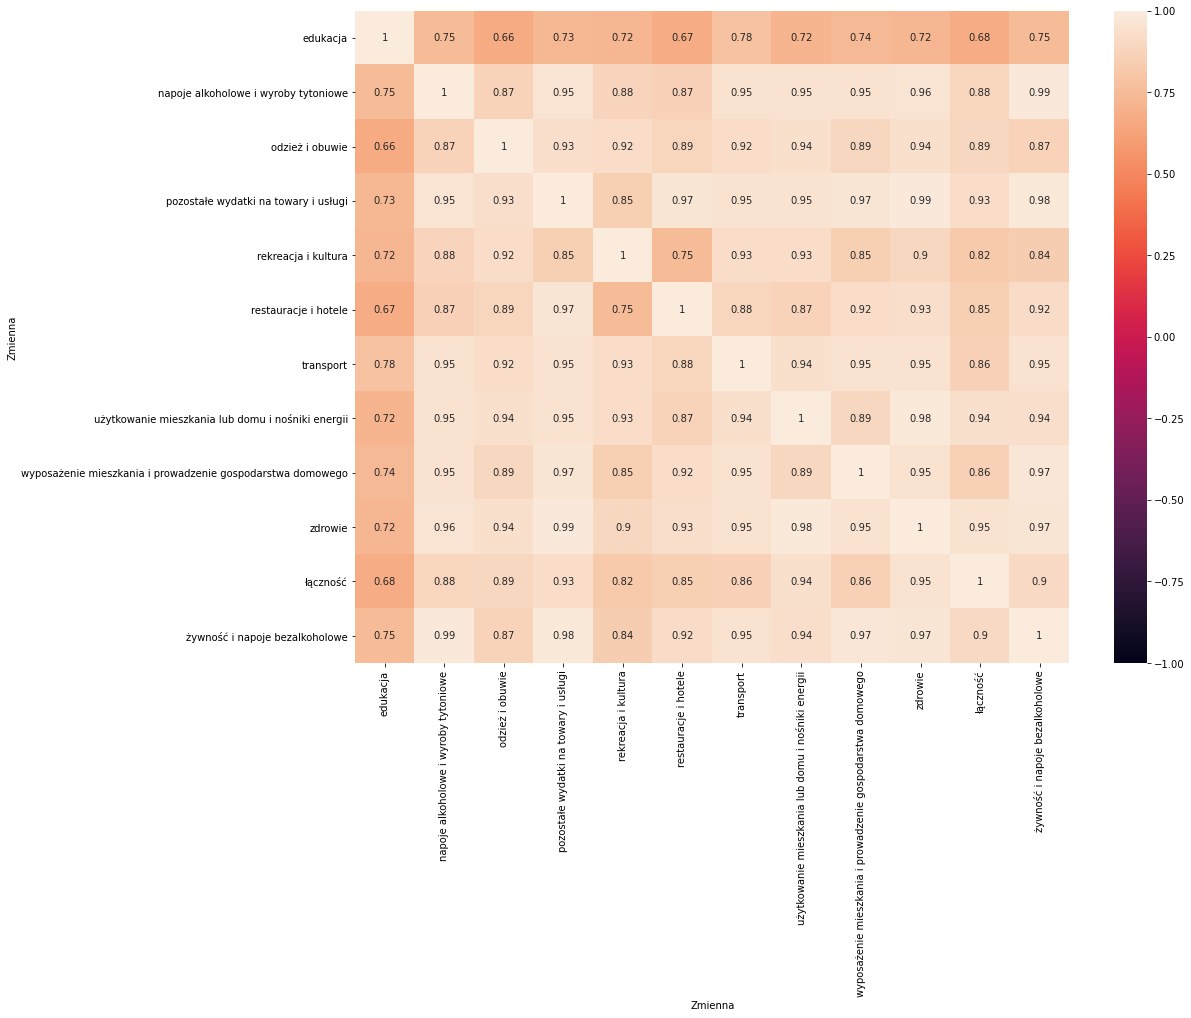

In [235]:
corr_df = food_expenses[(food_expenses.Zmienna != "ogółem") & (food_expenses.Zmienna != "towary i usługi konsumpcyjne")]
corr_df = corr_df.drop(['Jednostka miary','Kod','Atrybut','Unnamed: 8'], axis=1).reset_index()
corr_df = corr_df.pivot(index='Rok',columns='Zmienna', values='Wartosc')
corr_df = corr_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True);
corr_df

## Stosunek wydatków do dochodów w poszczególnych województwach w 2019 i 2020 roku

In [357]:
spendings_df = df_ludnosc[(df_ludnosc.Zmienna == "ogółem") & (df_ludnosc.Kategoria == "Wydatki") & (df_ludnosc["Jednostka miary"] == "zł") & ((df_ludnosc["Rok"] == 2019)|(df_ludnosc["Rok"] == 2020))]
spendings_df = spendings_df.groupby(['Nazwa','Rok']).sum()
spendings_df =  spendings_df.drop(['Unnamed: 8'], axis=1)
incomes_df =  df_ludnosc[(df_ludnosc.Zmienna == "ogółem") & (df_ludnosc.Kategoria == "Dochody") & (df_ludnosc["Jednostka miary"] == "zł") & ((df_ludnosc["Rok"] == 2019)|(df_ludnosc["Rok"] == 2020))]
incomes_df = incomes_df.groupby(['Nazwa','Rok']).sum()
incomes_df = incomes_df.drop(['Unnamed: 8'], axis=1)
spendings_vs_incomes = pd.merge(spendings_df, incomes_df, on =['Nazwa','Rok'], how ='inner')
spendings_vs_incomes.rename(columns={"Kod_x": "Kod", 'Wartosc_x': 'Wydatki', "Wartosc_y": "Dochody"}, inplace=True)
spendings_vs_incomes = spendings_vs_incomes.drop('Kod_y', axis=1)
spendings_vs_incomes['Wydatki do dochodów'] = (spendings_vs_incomes['Wydatki'] / spendings_vs_incomes['Dochody'])
spendings_vs_incomes.sort_values(by=['Wydatki do dochodów','Nazwa'], ascending=False)
display(spendings_vs_incomes)

Kod  Wydatki  Dochody  Wydatki do dochodów
Nazwa               Rok                                                 
DOLNOŚLĄSKIE        2019   200000  1382.62  1955.20             0.707150
                    2020   200000  1355.29  2031.24             0.667223
KUJAWSKO-POMORSKIE  2019   400000  1232.32  1770.82             0.695904
                    2020   400000  1168.59  1845.34             0.633265
LUBELSKIE           2019   600000  1114.35  1556.76             0.715814
                    2020   600000  1132.57  1679.02             0.674542
LUBUSKIE            2019   800000  1223.71  1794.12             0.682067
                    2020   800000  1157.30  1971.47             0.587024
MAZOWIECKIE         2019  1400000  1476.26  2108.01             0.700310
                    2020  1400000  1443.01  2240.52             0.644051
MAŁOPOLSKIE         2019  1200000  1077.73  1773.08             0.607829
                    2020  1200000  1041.52  1914.74             0.543949
OPOLSKIE            2019  1600000  1332.12  1687.29             0.789503
                    2020  1600000  1287.33  1711.34             0.752235
PODKARPACKIE        2019  1800000  1015.69  1471.49             0.690246
                    2020  1800000   930.94  1588.57             0.586024
PODLASKIE           2019  2000000  1029.51  1741.70             0.591095
                    2020  2000000  1020.37  1948.31             0.523721
POLSKA              2019        0  1251.73  1819.14             0.688089
                    2020        0  1209.58  1919.21             0.630249
POMORSKIE           2019  2200000  1360.50  1859.98             0.731459
                    2020  2200000  1328.72  1799.12             0.738539
WARMIŃSKO-MAZURSKIE 2019  2800000  1006.90  1597.18             0.630424
                    2020  2800000  1073.42  1884.05             0.569741
WIELKOPOLSKIE       2019  3000000  1162.82  1806.98             0.643516
                    2020  3000000  1123.35  1789.13             0.627875
ZACHODNIOPOMORSKIE  2019  3200000  1263.35  1801.11             0.701429
                    2020  3200000  1242.53  1862.09             0.667277
ŁÓDZKIE             2019  1000000  1374.59  1809.65             0.759589
                    2020  1000000  1225.52  1871.83             0.654718
ŚLĄSKIE             2019  2400000  1330.36  1897.39             0.701153
                    2020  2400000  1270.85  2050.36             0.619818
ŚWIĘTOKRZYSKIE      2019  2600000  1059.05  1626.46             0.651138
                    2020  2600000   994.00  1726.92             0.575591